In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyBigWig
import bbi

In [ ]:
!wget http://hgdownload.cse.ucsc.edu/goldenPath/hg19/encodeDCC/wgEncodeSydhTfbs/wgEncodeSydhTfbsGm12878Ctcfsc15914c20StdSig.bigWig

In [3]:
remote_path = ('http://hgdownload.cse.ucsc.edu/goldenPath/hg19/encodeDCC/wgEncodeSydhTfbs/'
               'wgEncodeSydhTfbsGm12878Ctcfsc15914c20StdSig.bigWig')
local_path = 'wgEncodeSydhTfbsGm12878Ctcfsc15914c20StdSig.bigWig'

In [4]:
bwf_remote = pyBigWig.open(remote_path)
bwf_local = pyBigWig.open(local_path)
chromsizes = bwf_remote.chroms()

In [6]:
nbins = 10000

chrom = 'chr1'
start = 0
end = (chromsizes[chrom] // nbins) * nbins

In [7]:
%time bwf = pyBigWig.open(remote_path)

CPU times: user 12 ms, sys: 4 ms, total: 16 ms
Wall time: 1.72 s


In [10]:
%timeit _ = bwf_remote.stats(chrom, start=start, end=end, nBins=nbins)

RuntimeError: An error was encountered while fetching statistics.

In [12]:
%timeit _ = bwf_local.stats(chrom, start=start, end=end, nBins=nbins)

1.67 s ± 132 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit x = bbi.fetch(local_path, 'chr1', 0, -1, bins=nbins)

8.78 ms ± 354 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%prun x = bbi.fetch(remote_path, 'chr1', 0, -1, bins=nbins)

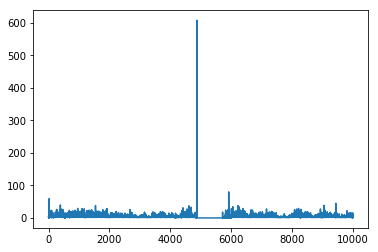

In [15]:
plt.plot(x)